In [1]:
%config Completer.use_jedi = False

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
CSV_FOLDER = "./grouped_data"
csv_files = [f for f in os.listdir(CSV_FOLDER) if ".csv" in f]
csv_files

['transactions_p1_2_2_1.csv',
 'transactions_p2_1_1_1.csv',
 'transactions_p2_2_2_2.csv',
 'transactions_p2_2_2_1.csv',
 'transactions_p1_1_1_2.csv',
 'transactions_p2_1_2_2.csv',
 'transactions_p1_2_1_1.csv',
 'transactions_p2_2_1_1.csv',
 'transactions_p1_2_1_2.csv',
 'transactions_p1_1_1_1.csv',
 'transactions_p2_1_1_2.csv',
 'transactions_p1_1_2_2.csv',
 'transactions_p1_2_2_2.csv',
 'transactions_p2_1_2_1.csv',
 'transactions_p1_1_2_1.csv',
 'transactions_p2_2_1_2.csv']

In [4]:
train = pd.DataFrame()
for csv in csv_files[:-3]:
    print(csv)
    temp = pd.read_csv(os.path.join(CSV_FOLDER, csv))
    train = train.append(temp)
    del temp

transactions_p1_2_2_1.csv
transactions_p2_1_1_1.csv
transactions_p2_2_2_2.csv
transactions_p2_2_2_1.csv
transactions_p1_1_1_2.csv
transactions_p2_1_2_2.csv
transactions_p1_2_1_1.csv
transactions_p2_2_1_1.csv
transactions_p1_2_1_2.csv
transactions_p1_1_1_1.csv
transactions_p2_1_1_2.csv
transactions_p1_1_2_2.csv
transactions_p1_2_2_2.csv


In [5]:
test = pd.DataFrame()
for csv in csv_files[-3:]:
    print(csv)
    temp = pd.read_csv(os.path.join(CSV_FOLDER, csv))
    test = test.append(temp)
    del temp

test.head()

transactions_p2_1_2_1.csv
transactions_p1_1_2_1.csv
transactions_p2_2_1_2.csv


,user_id,product_content_id,order_parent_id,is_returned,is_elite_user,order_line_item_id,num_items_cart,original_price_max,original_price_min,original_price_mean,...,rate_max_mean,rate_median_max,rate_median_min,rate_median_mean,rate_mean_max,rate_mean_min,rate_mean_mean,coupon_discount_max,coupon_discount_min,coupon_discount_mean
0,21698371,31630910,620930730,0.0,1,1,4,179.95,179.95,179.95,...,5.0,5.0,5.0,5.0,4.285714,4.285714,4.285714,0.0,0.0,0.0
1,21698371,36545817,641929166,0.0,1,1,1,84.99,84.99,84.99,...,5.0,5.0,5.0,5.0,4.377841,4.377841,4.377841,0.0,0.0,0.0
2,21698371,37206082,721959441,0.0,1,1,1,179.99,179.99,179.99,...,5.0,5.0,5.0,5.0,4.751961,4.751961,4.751961,0.0,0.0,0.0
3,21698371,39665405,620930730,0.0,1,1,4,34.90,34.90,34.90,...,5.0,5.0,5.0,5.0,5.000000,5.000000,5.000000,0.0,0.0,0.0
4,21698371,43543404,644985697,0.0,1,1,1,60.13,60.13,60.13,...,5.0,4.0,4.0,4.0,3.180791,3.180791,3.180791,0.0,0.0,0.0


In [8]:
with open("user_return_ratio.txt") as f:
    user_return_ratio = eval(f.read())

In [11]:
type(user_return_ratio)

dict

In [12]:
train["user_return_ratio"] = train["user_id"].apply(lambda x: user_return_ratio[x])

In [13]:
test["user_return_ratio"] = test["user_id"].apply(lambda x: user_return_ratio[x])

In [6]:
#train.columns

In [7]:
train.is_returned.value_counts()

0.0    7380569
1.0    1108043
Name: is_returned, dtype: int64

In [8]:
w0 = train.is_returned.sum()/train.shape[0]
w1 = 1 - w0

In [9]:
w0, w1

(0.1305328833500695, 0.8694671166499305)

In [10]:
test.is_returned.value_counts()

0.0    1724100
1.0     233481
Name: is_returned, dtype: int64

In [11]:
test.is_returned.value_counts(normalize=True)

0.0    0.88073
1.0    0.11927
Name: is_returned, dtype: float64

In [14]:
drop_cols = ['user_id', 'product_content_id', 'order_parent_id', 'is_returned']

In [15]:
group_cols = ["user_id", "product_content_id", "order_parent_id"]

In [16]:
sum(train[group_cols].duplicated())

0

In [17]:
sum(test[group_cols].duplicated())

0

In [18]:
train.head()

,user_id,product_content_id,order_parent_id,is_returned,is_elite_user,order_line_item_id,num_items_cart,original_price_max,original_price_min,original_price_mean,...,rate_median_max,rate_median_min,rate_median_mean,rate_mean_max,rate_mean_min,rate_mean_mean,coupon_discount_max,coupon_discount_min,coupon_discount_mean,user_return_ratio
0,13406044,31647722,708204798,0.0,0,1,1,120.99,120.99,120.99,...,2.0,2.0,2.0,2.000000,2.000000,2.000000,0.0,0.00,0.00,0.0000
1,13406044,66941205,617384934,0.0,0,1,1,41.25,41.25,41.25,...,5.0,5.0,5.0,4.105263,4.105263,4.105263,0.0,0.00,0.00,0.0000
2,13406044,94543724,600638921,0.0,0,1,1,150.00,150.00,150.00,...,5.0,5.0,5.0,4.221053,4.221053,4.221053,0.0,0.00,0.00,0.0000
3,13406044,94544034,600680166,0.0,0,1,1,150.00,150.00,150.00,...,5.0,5.0,5.0,4.047210,4.047210,4.047210,0.0,0.00,0.00,0.0000
4,13406065,1123580,635887409,1.0,0,2,5,59.95,59.95,59.95,...,5.0,5.0,5.0,4.048367,4.048367,4.048367,0.0,-0.94,-0.47,0.4375


In [19]:
X_train = train.drop(drop_cols, axis=1)
y_train = train["is_returned"]

In [20]:
X_test = test.drop(drop_cols, axis=1)
y_test = test["is_returned"]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_s = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [21]:
from lightgbm import LGBMClassifier, plot_importance

model = LGBMClassifier(random_state=0)

In [22]:
%%time
model.fit(X_train, y_train)

CPU times: user 6min 44s, sys: 11.3 s, total: 6min 55s
Wall time: 1min 8s


LGBMClassifier(random_state=0)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

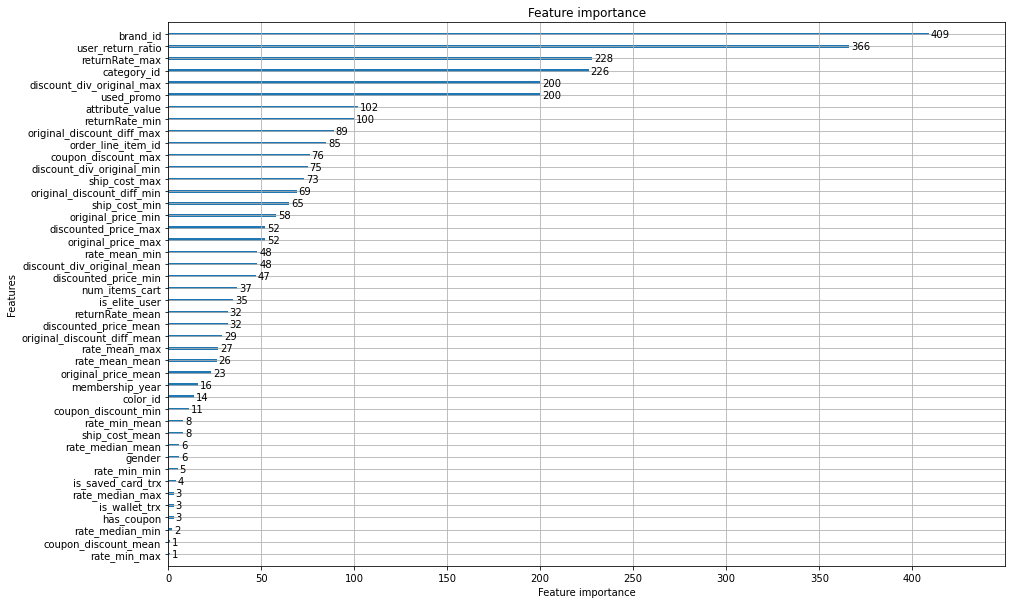

In [23]:
plot_importance(model, figsize=(15, 10))

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

preds = model.predict(X_test)
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[1689242   34858]
 [  74913  158568]]
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97   1724100
         1.0       0.82      0.68      0.74    233481

    accuracy                           0.94   1957581
   macro avg       0.89      0.83      0.86   1957581
weighted avg       0.94      0.94      0.94   1957581



In [22]:
from sklearn.metrics import confusion_matrix, classification_report

preds = model.predict(X_test)
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[1707478   16622]
 [ 128256  105225]]
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96   1724100
         1.0       0.86      0.45      0.59    233481

    accuracy                           0.93   1957581
   macro avg       0.90      0.72      0.78   1957581
weighted avg       0.92      0.93      0.92   1957581



In [25]:
test_data = pd.read_csv("test_data.csv")
test_data

,id,expected
0,18115|87073974|726348863,NaN
1,27588|118753298|723169934,NaN
2,29165|35699988|724122443,NaN
3,29969|5893187|722342150,NaN
4,35107|93897418|723421057,NaN
...,...,...
7466,71083899|100019570|728638514,NaN
7467,71106534|35624085|725372928,NaN
7468,71115350|94438742|725291348,NaN
7469,71115350|100017676|725291348,NaN


In [26]:
test_feats = pd.read_csv("test_feats.csv")
test_feats

,user_id,product_content_id,order_parent_id,is_returned,is_elite_user,order_line_item_id,num_items_cart,original_price_max,original_price_min,original_price_mean,...,rate_max_mean,rate_median_max,rate_median_min,rate_median_mean,rate_mean_max,rate_mean_min,rate_mean_mean,coupon_discount_max,coupon_discount_min,coupon_discount_mean
0,2141,80306720,726403811,NaN,0,1,1,229.990000,229.990000,229.990000,...,4.0,4.0,4.0,4.0,4.000000,4.000000,4.000000,0.0,0.0,0.0
1,2472,74477923,728406577,NaN,1,1,1,29.000000,29.000000,29.000000,...,5.0,5.0,5.0,5.0,4.416667,4.416667,4.416667,0.0,0.0,0.0
2,6888,110023460,726725509,NaN,1,1,4,124.950000,124.950000,124.950000,...,5.0,5.0,5.0,5.0,4.250559,4.250559,4.250559,0.0,0.0,0.0
3,6888,122717581,726725509,NaN,1,1,4,124.950000,124.950000,124.950000,...,5.0,5.0,5.0,5.0,4.066667,4.066667,4.066667,0.0,0.0,0.0
4,6888,126934595,726725509,NaN,1,1,4,114.950000,114.950000,114.950000,...,5.0,5.0,5.0,5.0,4.234043,4.234043,4.234043,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405277,71154882,101265853,722586386,NaN,0,1,3,230.093116,230.093116,230.093116,...,2.0,2.0,2.0,2.0,2.000000,2.000000,2.000000,0.0,0.0,0.0
405278,71160557,37491850,726377172,NaN,0,1,4,44.990000,44.990000,44.990000,...,5.0,5.0,5.0,5.0,4.303716,4.303716,4.303716,0.0,0.0,0.0
405279,71160557,46694896,726377172,NaN,0,1,4,166.650000,166.650000,166.650000,...,5.0,5.0,5.0,5.0,5.000000,5.000000,5.000000,0.0,0.0,0.0
405280,71160557,87073974,726377172,NaN,0,1,4,89.990000,89.990000,89.990000,...,5.0,5.0,5.0,5.0,4.486339,4.486339,4.486339,0.0,0.0,0.0


In [29]:
test_feats["user_return_ratio"] = test_feats["user_id"].apply(lambda x: user_return_ratio[x])

In [27]:
sum(test_feats[["user_id", "product_content_id", "order_parent_id"]].duplicated())

0

In [26]:
#test_feats = test_feats[~test_feats[["user_id", "product_content_id", "order_parent_id"]].duplicated()]

In [27]:
#sum(test_feats.duplicated())

0

In [30]:
test_preds = model.predict(test_feats[X_train.columns])

In [31]:
test_feats["pred"] = test_preds

In [32]:
test_feats[["user_id", "product_content_id", "order_parent_id", "pred"]]

,user_id,product_content_id,order_parent_id,pred
0,2141,80306720,726403811,0.0
1,2472,74477923,728406577,0.0
2,6888,110023460,726725509,0.0
3,6888,122717581,726725509,0.0
4,6888,126934595,726725509,0.0
...,...,...,...,...
405277,71154882,101265853,722586386,0.0
405278,71160557,37491850,726377172,0.0
405279,71160557,46694896,726377172,1.0
405280,71160557,87073974,726377172,1.0


In [33]:
test_data[["user_id", "product_content_id", "order_parent_id"]] = test_data["id"].str.split("|", expand=True)
test_data

,id,expected,user_id,product_content_id,order_parent_id
0,18115|87073974|726348863,NaN,18115,87073974,726348863
1,27588|118753298|723169934,NaN,27588,118753298,723169934
2,29165|35699988|724122443,NaN,29165,35699988,724122443
3,29969|5893187|722342150,NaN,29969,5893187,722342150
4,35107|93897418|723421057,NaN,35107,93897418,723421057
...,...,...,...,...,...
7466,71083899|100019570|728638514,NaN,71083899,100019570,728638514
7467,71106534|35624085|725372928,NaN,71106534,35624085,725372928
7468,71115350|94438742|725291348,NaN,71115350,94438742,725291348
7469,71115350|100017676|725291348,NaN,71115350,100017676,725291348


In [34]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7471 entries, 0 to 7470
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  7471 non-null   object 
 1   expected            0 non-null      float64
 2   user_id             7471 non-null   object 
 3   product_content_id  7471 non-null   object 
 4   order_parent_id     7471 non-null   object 
dtypes: float64(1), object(4)
memory usage: 292.0+ KB


In [35]:
test_data[["user_id", "product_content_id", "order_parent_id"]] = test_data[["user_id", "product_content_id", "order_parent_id"]].astype(int)
test_data

,id,expected,user_id,product_content_id,order_parent_id
0,18115|87073974|726348863,NaN,18115,87073974,726348863
1,27588|118753298|723169934,NaN,27588,118753298,723169934
2,29165|35699988|724122443,NaN,29165,35699988,724122443
3,29969|5893187|722342150,NaN,29969,5893187,722342150
4,35107|93897418|723421057,NaN,35107,93897418,723421057
...,...,...,...,...,...
7466,71083899|100019570|728638514,NaN,71083899,100019570,728638514
7467,71106534|35624085|725372928,NaN,71106534,35624085,725372928
7468,71115350|94438742|725291348,NaN,71115350,94438742,725291348
7469,71115350|100017676|725291348,NaN,71115350,100017676,725291348


In [36]:
sub = test_data.merge(test_feats[["user_id", "product_content_id", "order_parent_id", "pred"]],
                      how="left",
                on=["user_id", "product_content_id", "order_parent_id"]).drop(["expected", "user_id", "product_content_id", "order_parent_id"], axis=1)

In [37]:
sub

,id,pred
0,18115|87073974|726348863,1.0
1,27588|118753298|723169934,1.0
2,29165|35699988|724122443,0.0
3,29969|5893187|722342150,1.0
4,35107|93897418|723421057,0.0
...,...,...
7466,71083899|100019570|728638514,1.0
7467,71106534|35624085|725372928,0.0
7468,71115350|94438742|725291348,0.0
7469,71115350|100017676|725291348,0.0


In [38]:
sub.columns = ["id", "expected"]
sub

,id,expected
0,18115|87073974|726348863,1.0
1,27588|118753298|723169934,1.0
2,29165|35699988|724122443,0.0
3,29969|5893187|722342150,1.0
4,35107|93897418|723421057,0.0
...,...,...
7466,71083899|100019570|728638514,1.0
7467,71106534|35624085|725372928,0.0
7468,71115350|94438742|725291348,0.0
7469,71115350|100017676|725291348,0.0


In [39]:
sub.isna().sum()

id          0
expected    0
dtype: int64

In [40]:
sub["expected"] = sub["expected"].astype(int)

In [41]:
sub

,id,expected
0,18115|87073974|726348863,1
1,27588|118753298|723169934,1
2,29165|35699988|724122443,0
3,29969|5893187|722342150,1
4,35107|93897418|723421057,0
...,...,...
7466,71083899|100019570|728638514,1
7467,71106534|35624085|725372928,0
7468,71115350|94438742|725291348,0
7469,71115350|100017676|725291348,0


In [42]:
sub.expected.value_counts(normalize=True)

0    0.879936
1    0.120064
Name: expected, dtype: float64

In [43]:
sub.to_csv("sub5.csv", index=False)